In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

LOAD DATASET

In [2]:
df = pd.read_csv('Medicalpremium.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
print("Shape:", df.shape)

Shape: (986, 11)


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


Feature Categorization

In [7]:
numerical_features = ['Age', 'Height', 'Weight', 'PremiumPrice']
categorical_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 
                        'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

Handling Outliers

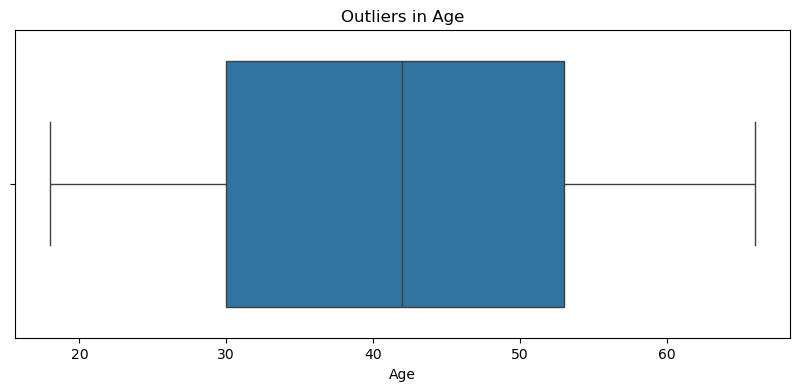

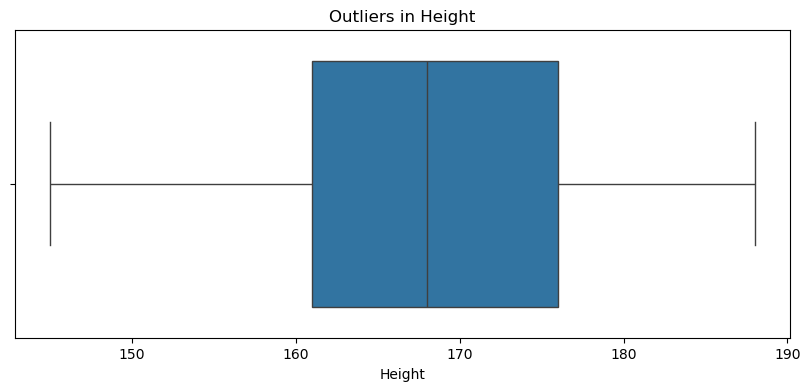

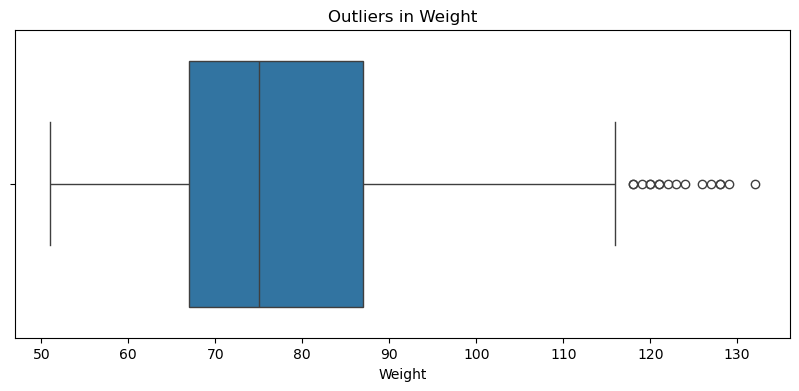

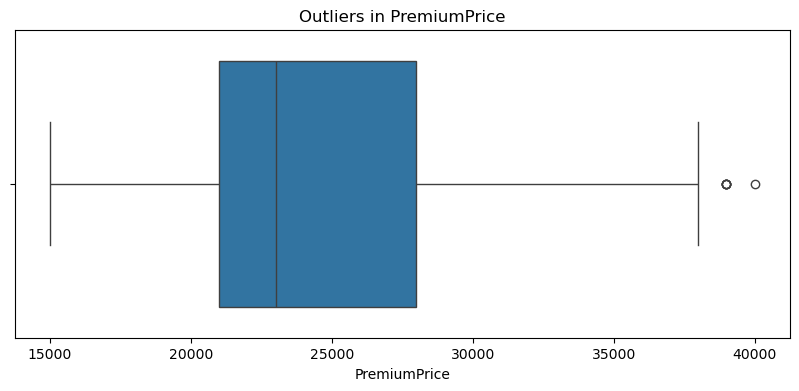

In [8]:
#Box plots to identify outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()

In [9]:
#outlier Handling using IQR method
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [10]:
df[["Age","Height","Weight","PremiumPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,965.0,41.843523,13.876881,18.0,30.0,42.0,53.0,66.0
Height,965.0,168.238342,10.136577,145.0,161.0,168.0,176.0,188.0
Weight,965.0,76.191710,13.063583,51.0,67.0,75.0,86.0,116.0
PremiumPrice,965.0,24248.704663,6128.830488,15000.0,21000.0,23000.0,28000.0,38000.0


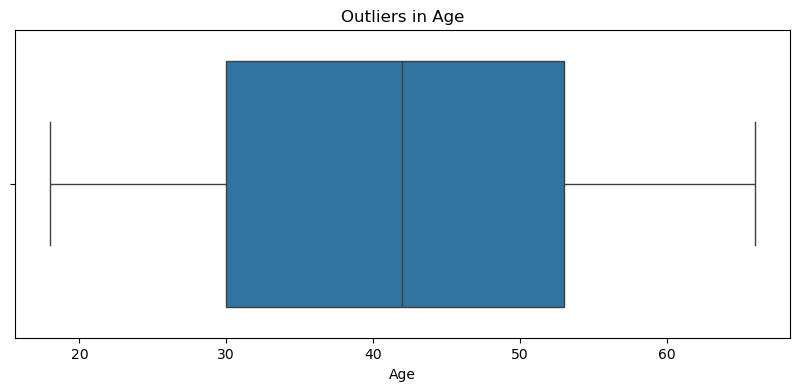

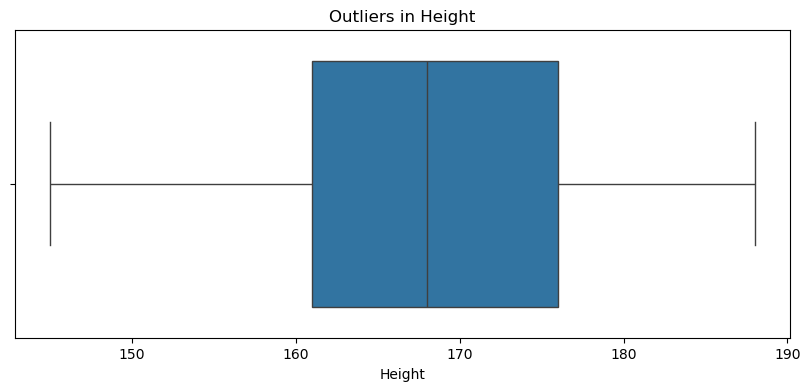

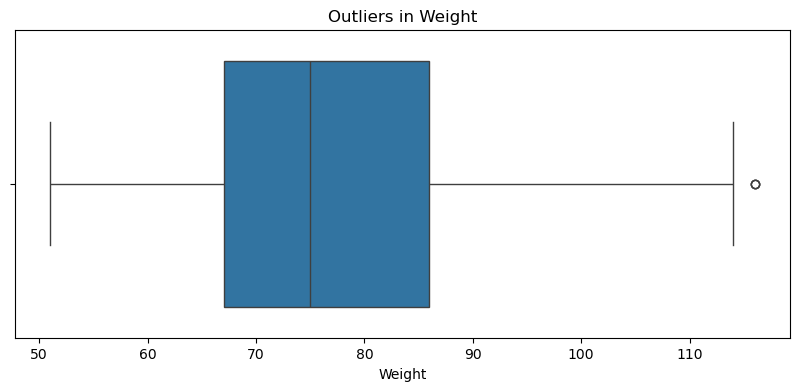

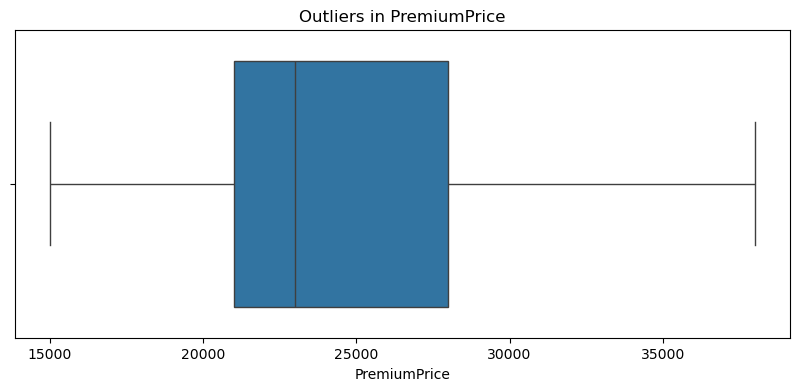

In [11]:
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()

In [12]:
d1 = pd.DataFrame(df["Diabetes"].value_counts().reset_index())
d1.columns = ["Diabetes","Count"]
d1["% count"] = round((d1["Count"]/len(df))*100,2)

d2 = pd.DataFrame(df['BloodPressureProblems'].value_counts().reset_index())
d2.columns = ['BloodPressureProblems',"Count"]
d2["% count"] = round((d2["Count"]/len(df))*100,2)

d3 = pd.DataFrame(df['AnyTransplants'].value_counts().reset_index())
d3.columns = ["AnyTransplants","Count"]
d3["% count"] = round((d3["Count"]/len(df))*100,2)

d4 = pd.DataFrame(df['AnyChronicDiseases'].value_counts().reset_index())
d4.columns = ['AnyChronicDiseases',"Count"]
d4["% count"] = round((d4["Count"]/len(df))*100,2)

d5 = pd.DataFrame(df['KnownAllergies'].value_counts().reset_index())
d5.columns = ['KnownAllergies',"Count"]
d5["% count"] = round((d5["Count"]/len(df))*100,2)

d6 = pd.DataFrame(df['HistoryOfCancerInFamily'].value_counts().reset_index())
d6.columns = ['HistoryOfCancerInFamily',"Count"]
d6["% count"] = round((d6["Count"]/len(df))*100,2)

d7 = pd.DataFrame(df['NumberOfMajorSurgeries'].value_counts().reset_index())
d7.columns = ['NumberOfMajorSurgeries',"Count"]
d7["% count"] = round((d7["Count"]/len(df))*100,2)

In [13]:
explode_Diabetes = (0.05,0.05)
explode_Blood_pressure = (0.05,0.05)
explode_transplants = (0.05,0.05)
explode_chronic_disease = (0.05,0.05)
explode_allergies = (0.05,0.05)
explode_history_cancer = (0.05,0.05)

colors_Diabetes = ['beige',"grey"]
colors_Blood_pressure = ["orange", "cyan"]
colors_transplants = ['yellowgreen','gold']
colors_working_day = ["cyan", 'lightskyblue']
colors_chronic_disease = ['beige',"grey"]
colors_allergies = ["orange", "cyan"]
colors_history_cancer = ['yellowgreen','gold']

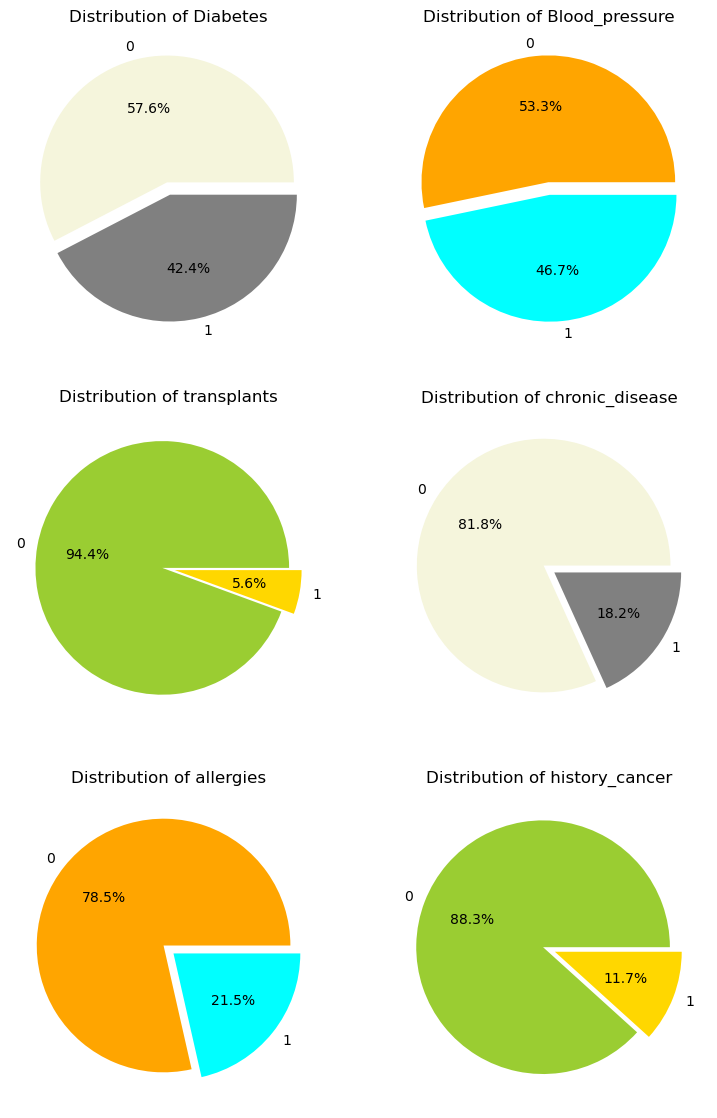

In [16]:
plt.figure(figsize = (9,14))

plt.subplot(3,2,1)
plt.pie(d1["Count"], labels=d1["Diabetes"], explode=explode_Diabetes,colors = colors_Diabetes, 
        autopct='%1.1f%%')
plt.title("Distribution of Diabetes", fontsize = 12)

plt.subplot(3,2,2)
plt.pie(d2["Count"], labels=d2['BloodPressureProblems'], explode=explode_Blood_pressure,colors = colors_Blood_pressure, 
        autopct='%1.1f%%')
plt.title("Distribution of Blood_pressure", fontsize = 12)

plt.subplot(3,2,3)
plt.pie(d3["Count"], labels=d3["AnyTransplants"], explode=explode_transplants,
        colors = colors_transplants, autopct='%1.1f%%')
plt.title("Distribution of transplants", fontsize = 12)

plt.subplot(3,2,4)
plt.pie(d4["Count"], labels=d4['AnyChronicDiseases'], explode=explode_chronic_disease,colors = colors_chronic_disease, 
        autopct='%1.1f%%')
plt.title("Distribution of chronic_disease", fontsize = 12)

plt.subplot(3,2,5)
plt.pie(d5["Count"], labels=d5["KnownAllergies"], explode=explode_allergies,
        colors = colors_allergies, autopct='%1.1f%%')
plt.title("Distribution of allergies", fontsize = 12)

plt.subplot(3,2,6)
plt.pie(d6["Count"], labels=d6['HistoryOfCancerInFamily'], explode=explode_history_cancer,colors = colors_history_cancer, 
        autopct='%1.1f%%')
plt.title("Distribution of history_cancer", fontsize = 12)

plt.show()

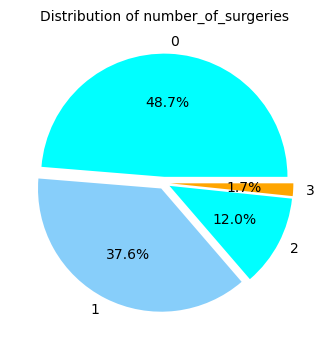

In [15]:
explode_no_surgeries = (0.05,0.05,0.05,0.05)
colors_no_surgeries = ["cyan", 'lightskyblue', "cyan","orange"]

plt.figure(figsize = (7,4))
plt.pie(d7["Count"], labels=d7['NumberOfMajorSurgeries'], explode=explode_no_surgeries,colors = colors_no_surgeries, 
        autopct='%1.1f%%')
plt.title("Distribution of number_of_surgeries", fontsize = 10)
plt.show()

# Univariate Analysis

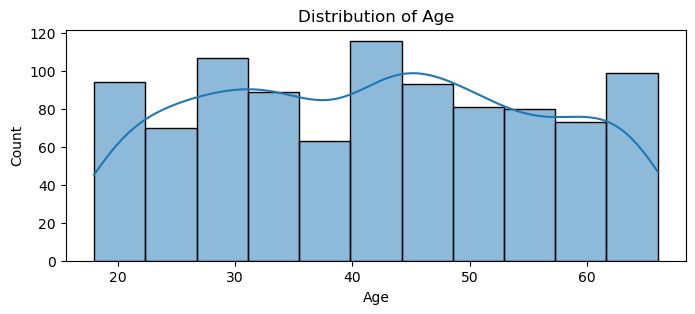

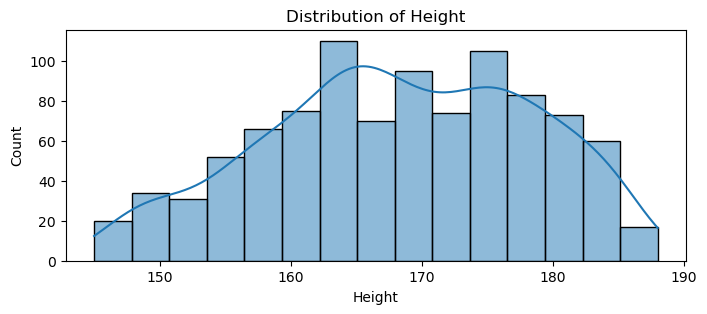

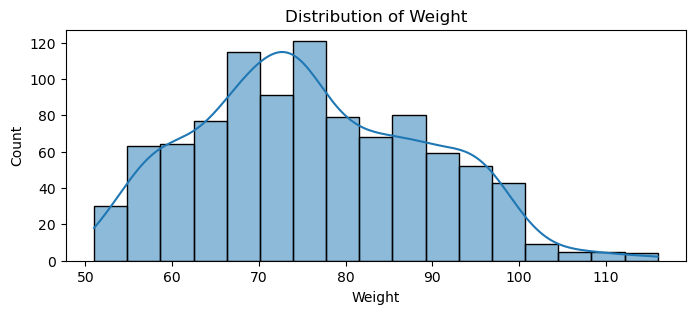

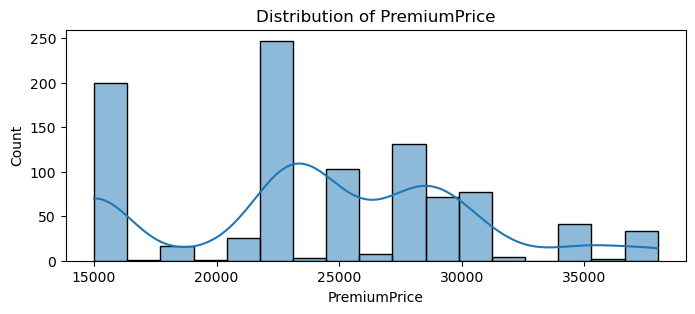

In [17]:
for feature in numerical_features:
    plt.figure(figsize=(8, 3))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()